In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")

In [25]:
clean = np.vectorize(lambda str: str.strip().replace('  ', ' ').replace(' ', '_').lower())
df.columns = clean(df.columns)
df.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)

In [27]:
df.describe().iloc[:, 1:]

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2928.000000,2783.000000,2006.000000,2744.000000,2938.000000,2385.000000,2938.000000,2268.000000,2045.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,172.966942,21.492522,4.602861,738.251295,80.940461,2419.592240,38.343827,26.935941,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,122.083952,30.353293,4.052413,1987.914858,25.070016,11467.272489,16.080367,36.730990,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,13.000000,1.000000,0.010000,0.000000,1.000000,0.000000,11.200000,1.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,82.000000,2.000000,0.877500,4.685343,77.000000,0.000000,22.100000,2.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,148.000000,8.000000,3.755000,64.912906,92.000000,17.000000,42.400000,9.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,234.000000,29.000000,7.702500,441.534144,97.000000,360.250000,54.200000,39.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,206.000000,17.870000,19479.911610,99.000000,212183.000000,59.900000,194.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
df.adult_mortality = df.apply(lambda x: np.nan if x.adult_mortality < df.adult_mortality.quantile(0.05) else x.adult_mortality, axis=1)
df.infant_deaths = df.infant_deaths.replace(0, np.nan)
df.infant_deaths = df.apply(lambda x: np.nan if x.infant_deaths > df.infant_deaths.quantile(0.96) else x.infant_deaths, axis=1)
df["under-five_deaths"] = df["under-five_deaths"].replace(0, np.nan)
df["under-five_deaths"] = df.apply(lambda x: np.nan if x["under-five_deaths"] > df["under-five_deaths"].quantile(0.95) else x["under-five_deaths"], axis=1)
df.bmi = df.apply(lambda x: np.nan if (x.bmi < 10 or x.bmi > 60) else x.bmi, axis=1)

In [28]:
limit = [[0.004, 0], [0, 0.07], [0, 0], [0, 0], [0, 0.133], [0.087, 0],
          [0, 0.185], [0, 0], [0, 0], [0.1, 0], [0, 0.083], [0.11, 0], 
          [0, 0.185], [0, 0.182], [0, 0.231], [0, 0.04], [0, 0.045], [0.05, 0], 
          [0.015, 0.06], [0, 0]]
wins_df = df.iloc[:, :3]
for i, col in enumerate(df.columns[3:]):
    wins_df[col] = winsorize(df[col], limits=limit[i])
wins_df = wins_df.set_index(["country", "year"])

In [29]:
wins_df1 = wins_df[wins_df.infant_deaths < wins_df.infant_deaths.median()]
wins_df2 = wins_df[wins_df.infant_deaths > wins_df.infant_deaths.median()]

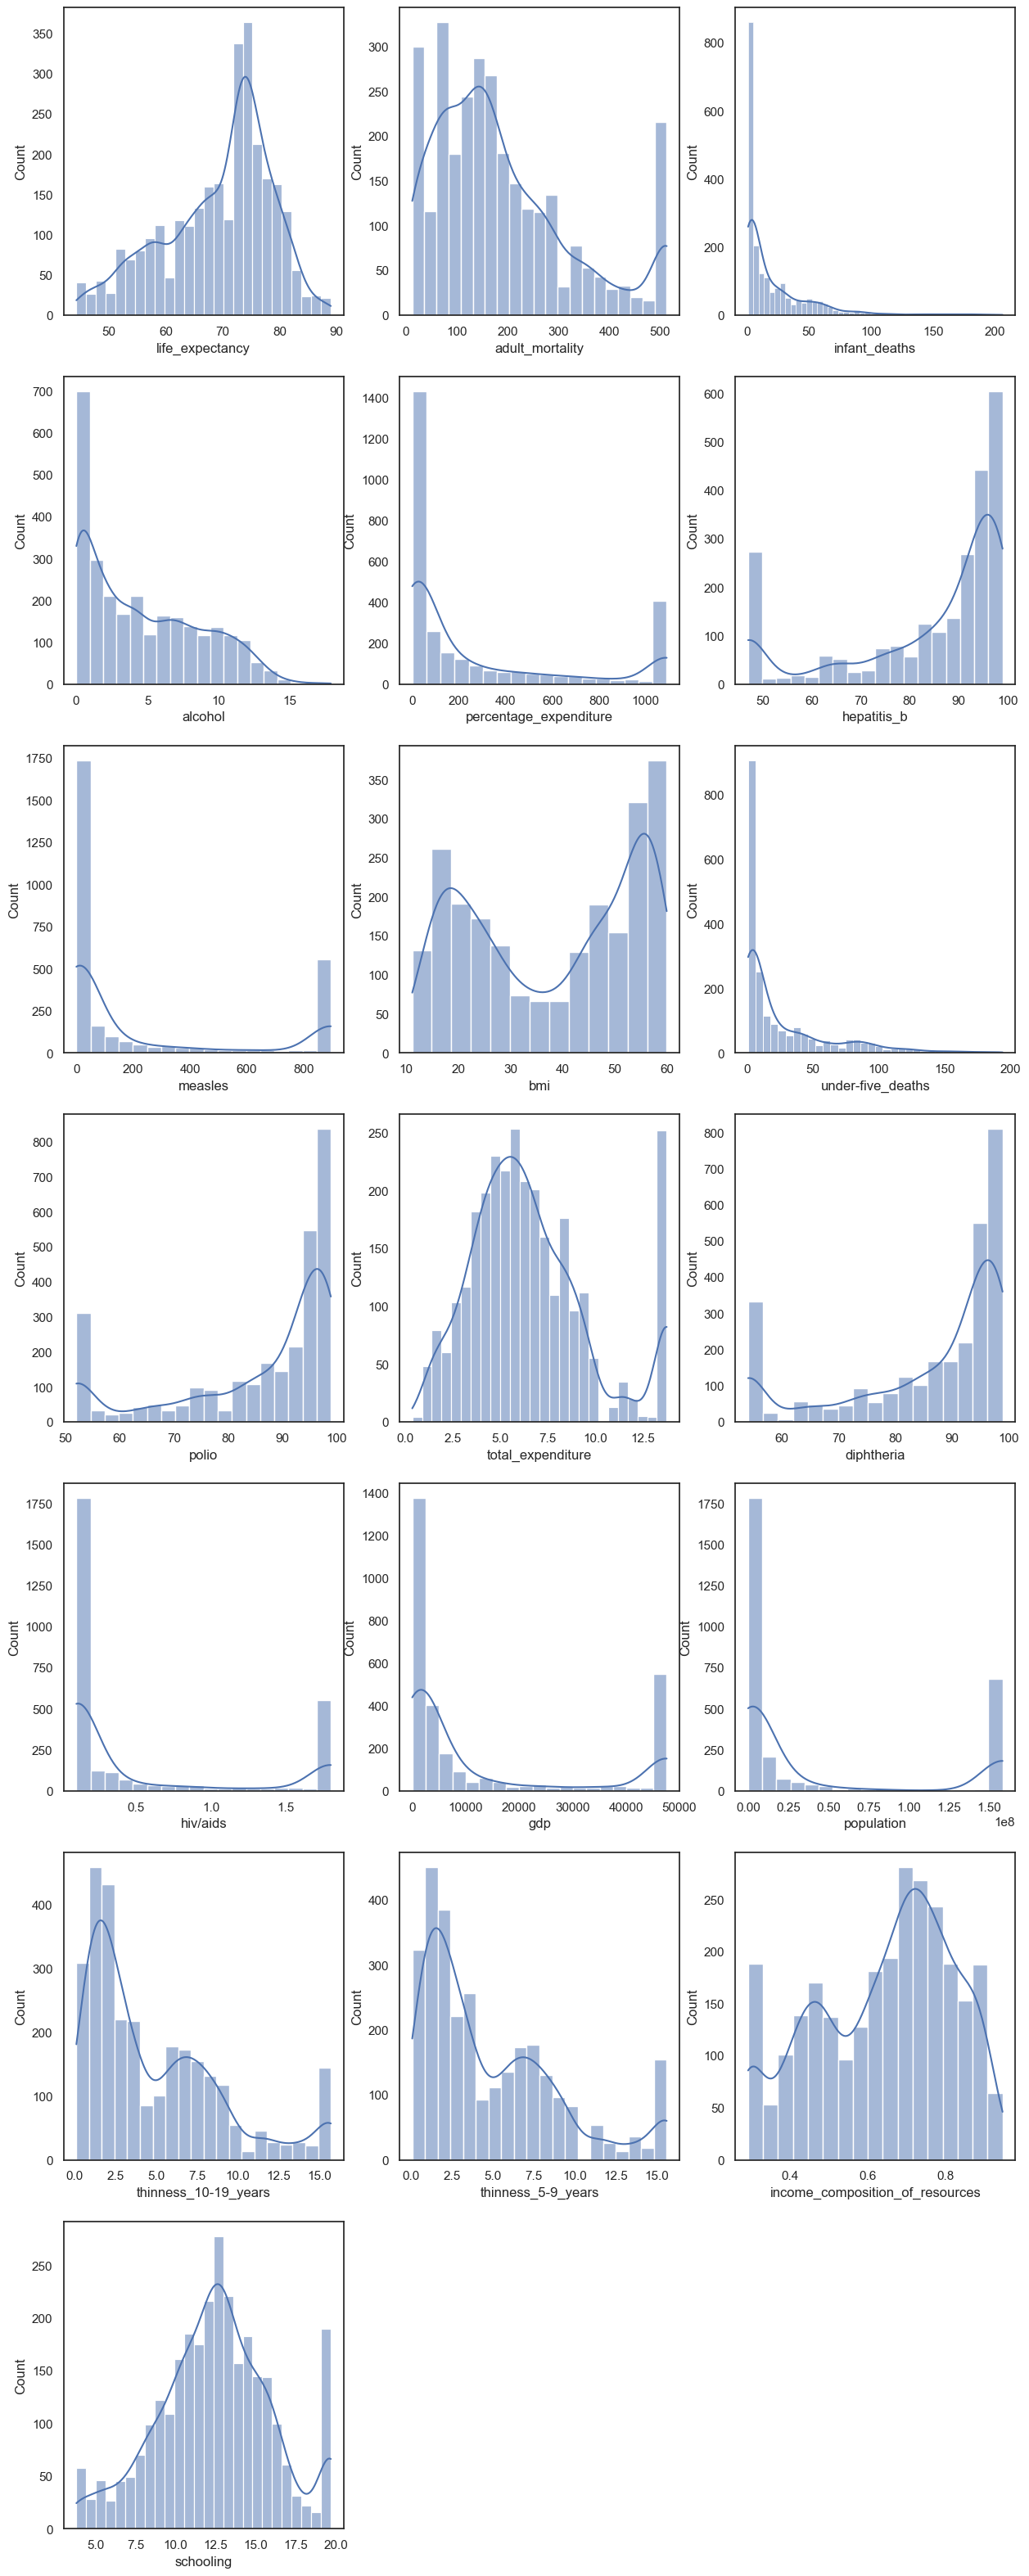

In [30]:
plt.figure(figsize=(15, 40))
for i, col in enumerate(wins_df.columns[1:], 1):
    plt.subplot(7, 3, i)
    sns.histplot(data=wins_df, x=col, kde=True)
plt.show()

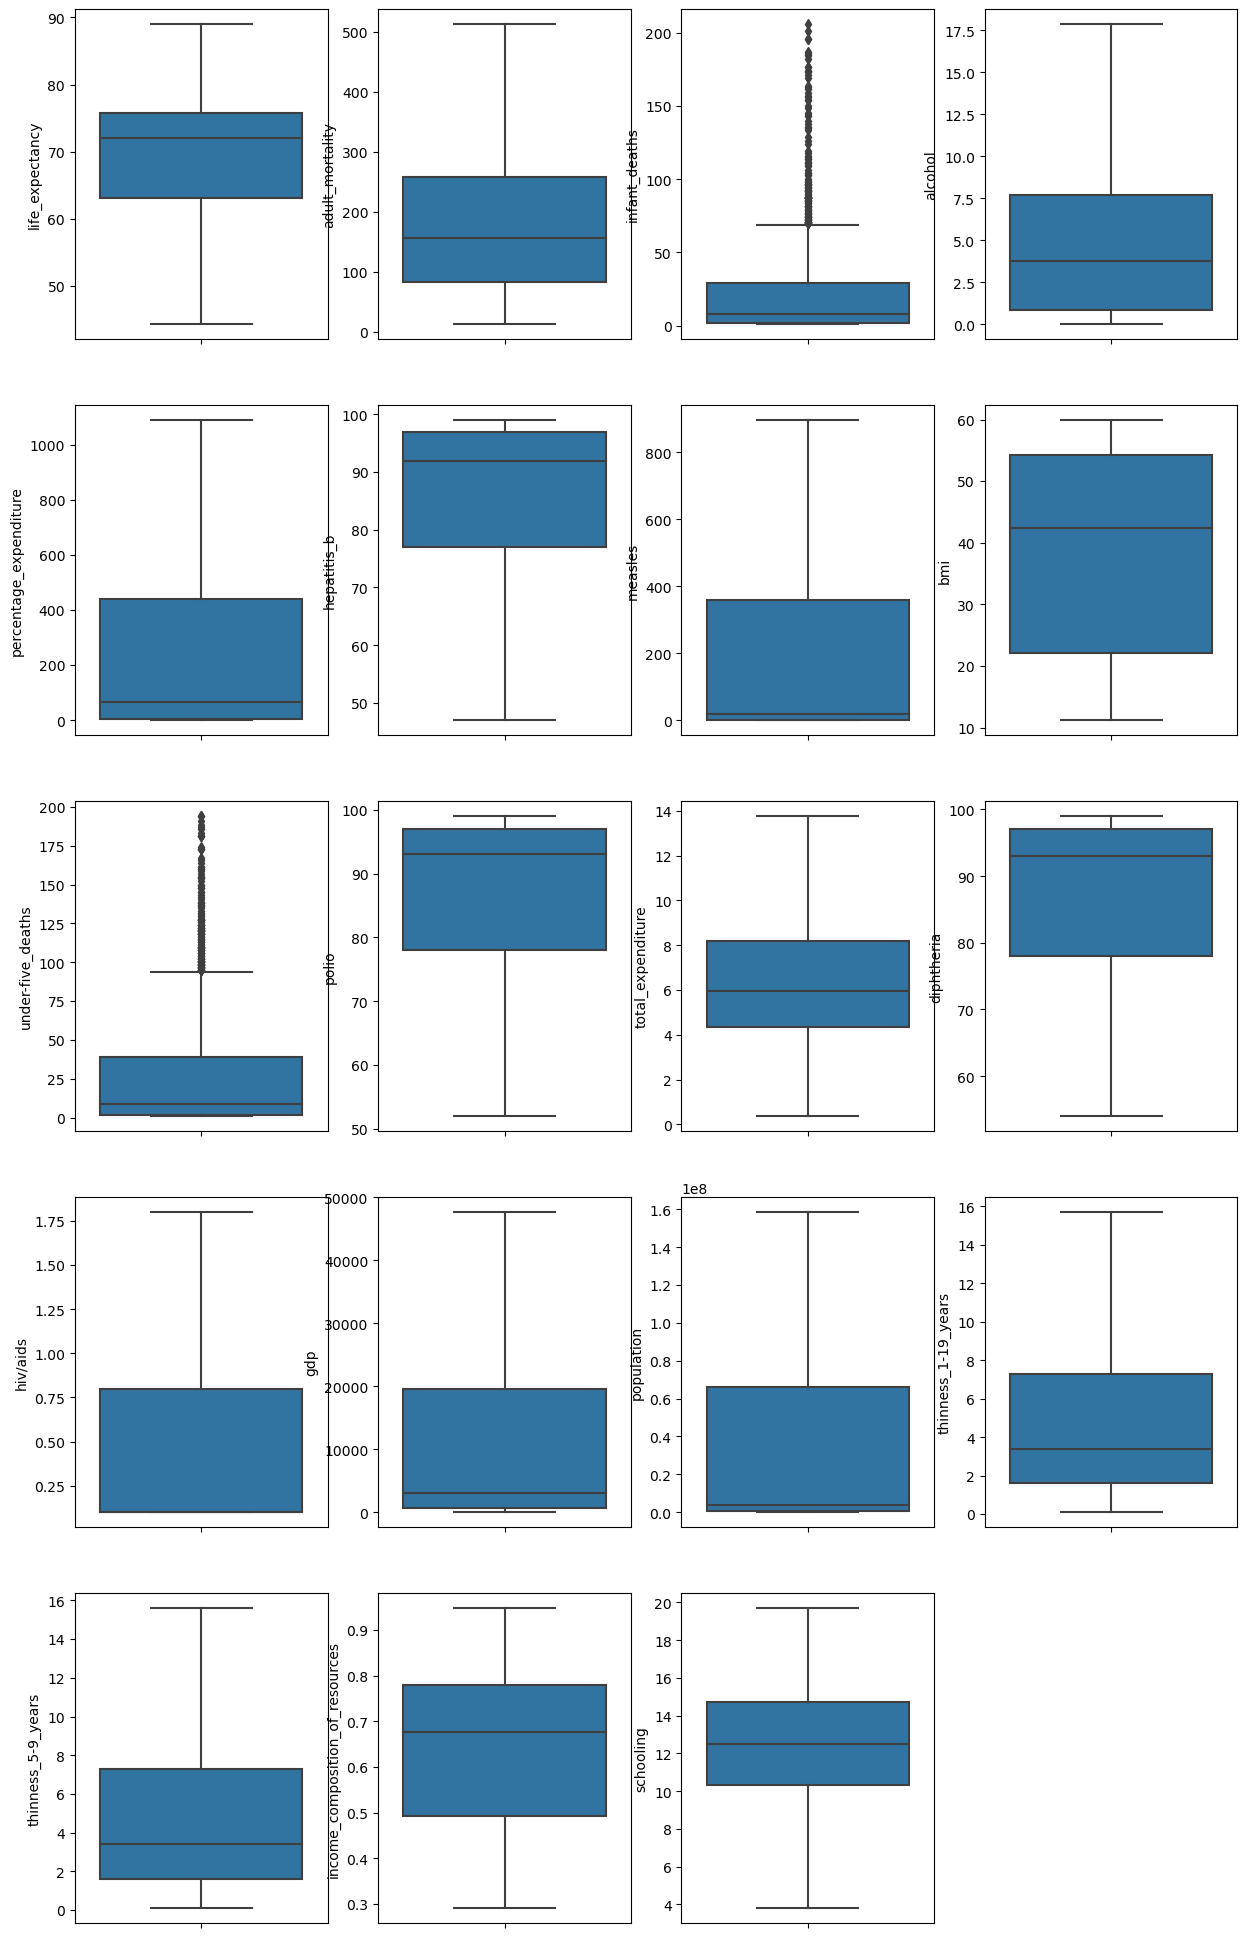

In [9]:
plt.figure(figsize=(15, 30))
for i, col in enumerate(wins_df.columns[1:], 1):
    plt.subplot(6, 4, i)
    sns.boxplot(data=wins_df, y=col)
plt.show()

In [10]:
print(wins_df.std(numeric_only=True))

life_expectancy                    9.499179e+00
adult_mortality                    1.368230e+02
infant_deaths                      3.035329e+01
alcohol                            4.052413e+00
percentage_expenditure             3.875622e+02
hepatitis_b                        1.688845e+01
measles                            3.520018e+02
bmi                                1.608037e+01
under-five_deaths                  3.673099e+01
polio                              1.531324e+01
total_expenditure                  3.143115e+00
diphtheria                         1.478930e+01
hiv/aids                           6.759625e-01
gdp                                1.830654e+04
population                         6.551296e+07
thinness_1-19_years                4.130285e+00
thinness_5-9_years                 4.140204e+00
income_composition_of_resources    1.762171e-01
schooling                          3.593537e+00
dtype: float64


In [11]:
wins_df.cov(numeric_only=True)

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
life_expectancy,9.023440e+01,-6.414084e+02,-1.104890e+02,1.566138e+01,1.800356e+03,4.580170e+01,-1.126914e+03,1.080424e+02,-1.845811e+02,8.351182e+01,4.698800e+00,8.192470e+01,-5.122140e+00,4.342590e+04,5.796365e+07,-2.058782e+01,-2.063877e+01,1.361109e+00,2.102790e+01
adult_mortality,-6.414084e+02,1.872054e+04,6.690725e+02,-6.719099e+01,-8.723214e+03,-3.613338e+02,7.399292e+03,-6.822232e+02,1.222773e+03,-4.861745e+02,-2.298298e+01,-4.866913e+02,4.050485e+01,-1.988993e+05,-4.243145e+08,1.323916e+02,1.348182e+02,-8.681901e+00,-1.123831e+02
infant_deaths,-1.104890e+02,6.690725e+02,9.213224e+02,-2.649236e+01,-2.583135e+03,-1.183759e+02,5.035055e+03,-2.280594e+02,9.256585e+02,-1.417286e+02,-6.931189e+00,-1.344672e+02,5.382991e+00,-4.011974e+04,1.293817e+08,3.601279e+01,3.394953e+01,-1.828677e+00,-2.729315e+01
alcohol,1.566138e+01,-6.719099e+01,-2.649236e+01,1.642205e+01,6.277435e+02,7.972794e+00,-2.870201e+02,3.111156e+01,-3.406409e+01,1.693396e+01,2.653953e+00,1.700234e+01,-5.446990e-01,1.653847e+04,-1.046366e+07,-7.452006e+00,-7.324350e+00,3.635410e-01,7.409864e+00
percentage_expenditure,1.800356e+03,-8.723214e+03,-2.583135e+03,6.277435e+02,1.502045e+05,7.647138e+02,-2.652526e+04,2.742951e+03,-3.585599e+03,1.591162e+03,-1.216584e+01,1.553601e+03,-7.745696e+01,1.249976e+06,-3.094353e+09,-5.367609e+02,-5.425007e+02,3.900239e+01,5.169209e+02
hepatitis_b,4.580170e+01,-3.613338e+02,-1.183759e+02,7.972794e+00,7.647138e+02,2.852199e+02,-1.507494e+03,6.857850e+01,-1.471160e+02,1.547867e+02,3.230239e+00,1.620483e+02,-2.842943e+00,2.393829e+04,1.417657e+08,-8.821025e+00,-9.247392e+00,7.967934e-01,1.384302e+01
measles,-1.126914e+03,7.399292e+03,5.035055e+03,-2.870201e+02,-2.652526e+04,-1.507494e+03,1.239053e+05,-2.516309e+03,6.009517e+03,-1.744404e+03,-1.476792e+02,-1.673555e+03,5.353415e+01,-4.234451e+05,6.507894e+08,5.262876e+02,5.332062e+02,-1.727262e+01,-3.047574e+02
bmi,1.080424e+02,-6.822232e+02,-2.280594e+02,3.111156e+01,2.742951e+03,6.857850e+01,-2.516309e+03,2.585782e+02,-3.076474e+02,1.177399e+02,7.897434e+00,1.145462e+02,-6.539764e+00,5.281049e+04,2.159098e+07,-4.420466e+01,-4.421802e+01,2.020401e+00,3.076889e+01
under-five_deaths,-1.845811e+02,1.222773e+03,9.256585e+02,-3.406409e+01,-3.585599e+03,-1.471160e+02,6.009517e+03,-3.076474e+02,1.349166e+03,-2.121978e+02,-3.098808e+00,-2.072140e+02,9.931347e+00,-4.112996e+04,1.382895e+08,5.129993e+01,5.392377e+01,-2.844304e+00,-3.981434e+01
polio,8.351182e+01,-4.861745e+02,-1.417286e+02,1.693396e+01,1.591162e+03,1.547867e+02,-1.744404e+03,1.177399e+02,-2.121978e+02,2.344953e+02,5.198412e+00,1.945400e+02,-4.931404e+00,4.609820e+04,1.138947e+08,-1.849800e+01,-1.849697e+01,1.421411e+00,2.356046e+01


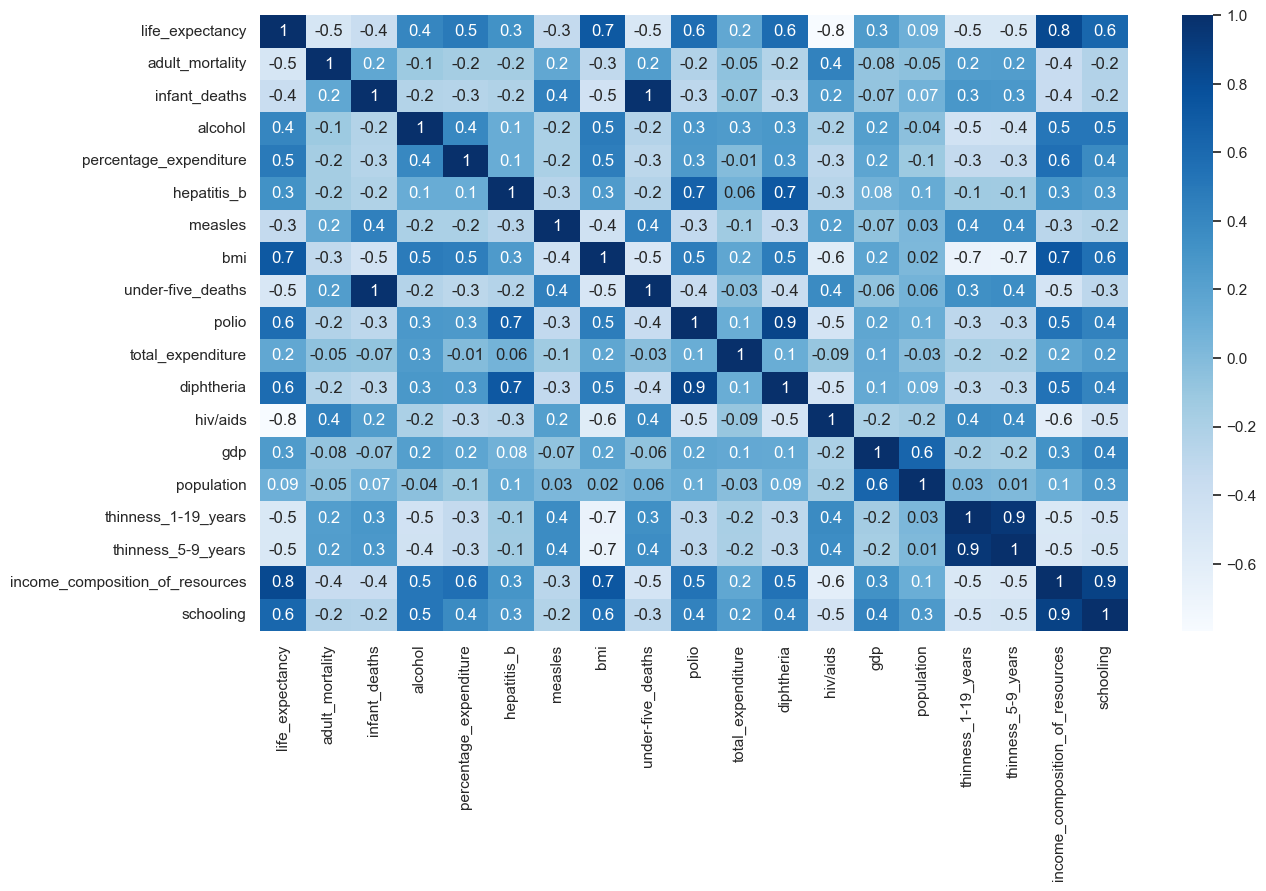

In [12]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
pearson  = wins_df.corr(numeric_only=True)
heatmap = sns.heatmap(pearson , annot=True, cmap="Blues", fmt='.1g')

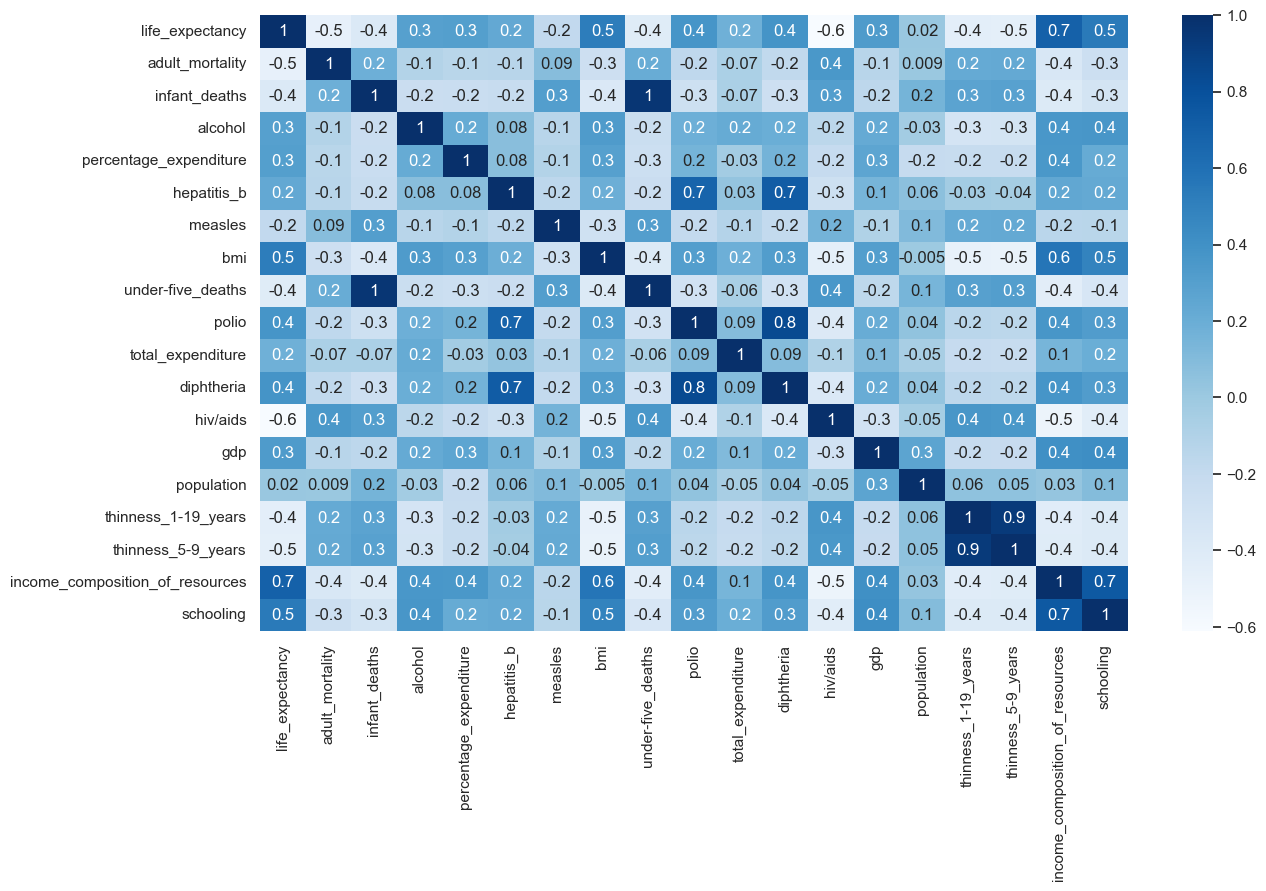

In [13]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
kendall = wins_df.corr(method='kendall', numeric_only=True)
heatmap = sns.heatmap(kendall, annot=True, cmap="Blues", fmt='.1g')

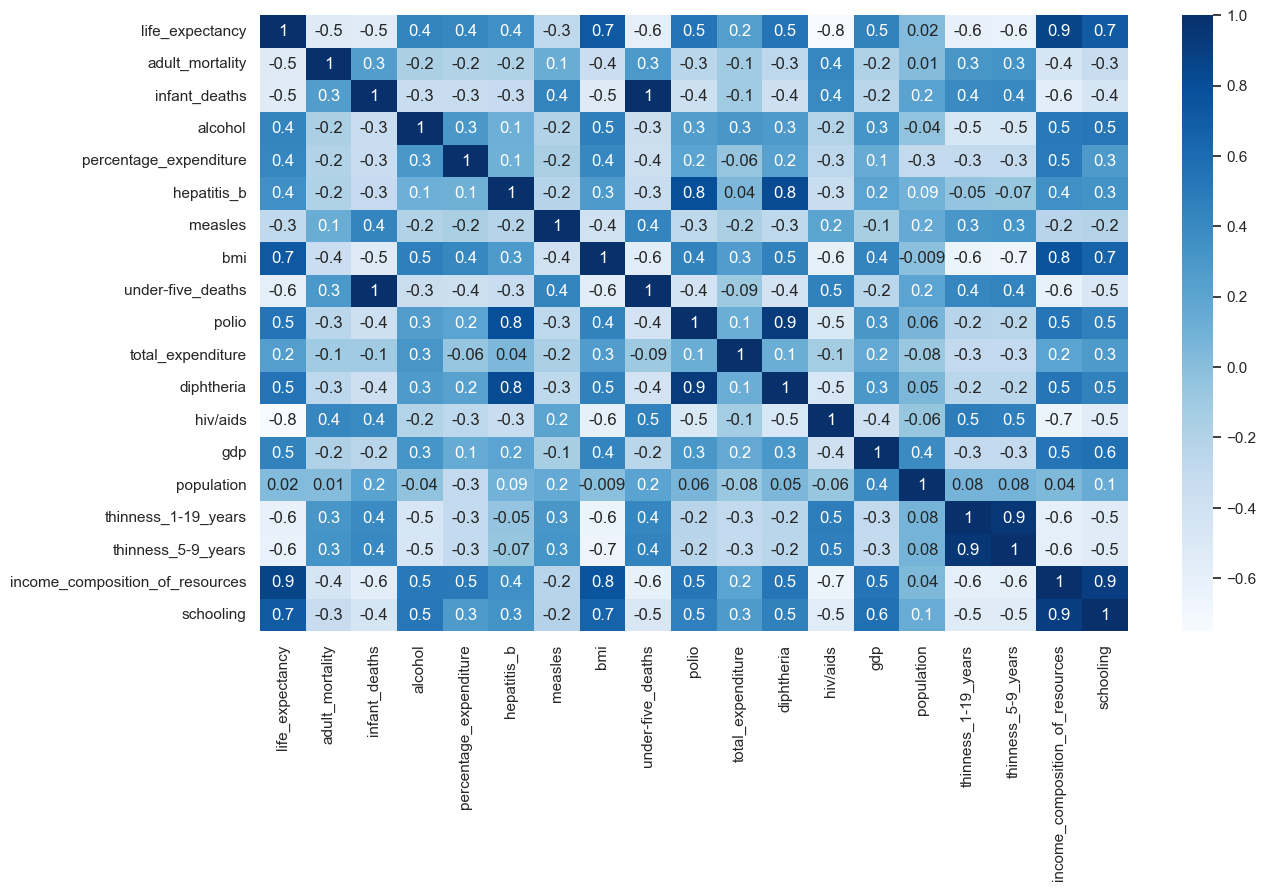

In [14]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
spearman = wins_df.corr(method='spearman', numeric_only=True)
heatmap = sns.heatmap(spearman, annot=True, cmap="Blues", fmt='.1g')

>Як рівень дитячої та дорослої смертності впливає на тривалість життя?

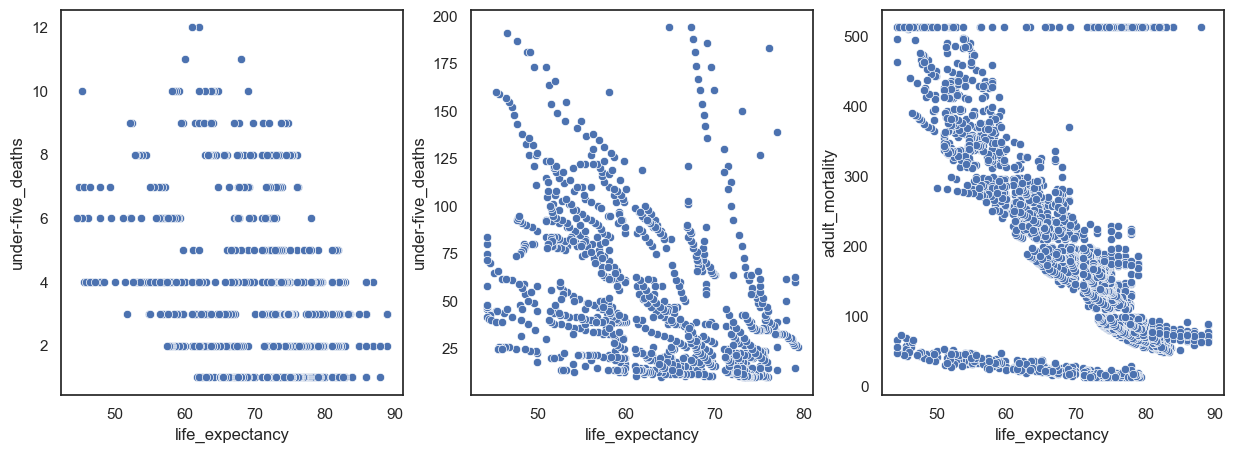

Correlation under-five_deaths:-0.5146129791529317
Correlation adult_mortality:-0.49743811632101603


In [19]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(data=wins_df1, x="life_expectancy", y="under-five_deaths")
plt.subplot(1, 3, 2)
sns.scatterplot(data=wins_df2, x="life_expectancy", y="under-five_deaths")
plt.subplot(1, 3, 3)
sns.scatterplot(data=wins_df, x="life_expectancy", y="adult_mortality")
plt.show()
print("Correlation under-five_deaths:" + str(pearson["life_expectancy"]["under-five_deaths"]))
print("Correlation adult_mortality:" + str(pearson["life_expectancy"]["adult_mortality"]))

Рівень дитячої та дорослої смертності сильно негативно впливає на очікувану тривалість життя.

>Який вплив навчання в школі на тривалість життя людини?

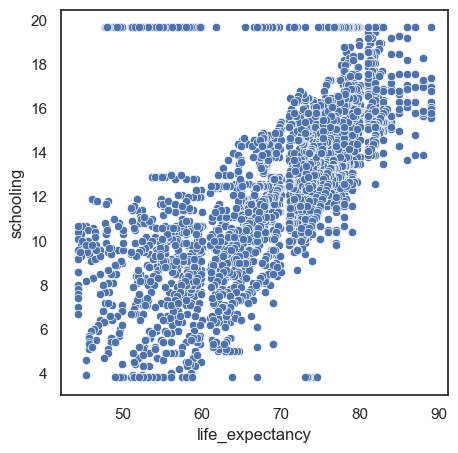

Correlation schooling:0.6176239380860434


In [20]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=wins_df, x="life_expectancy", y="schooling")
plt.show()
print("Correlation schooling:" + str(pearson["life_expectancy"]["schooling"]))

Є лінійна залежність між навчанням в школі та тривалістю життя. В країнах з більшою кількістю років навчання очікувана тривалість життя більша.

>Позитивний чи негативний зв’язок очікуваної тривалості життя з вживанням алкоголю?

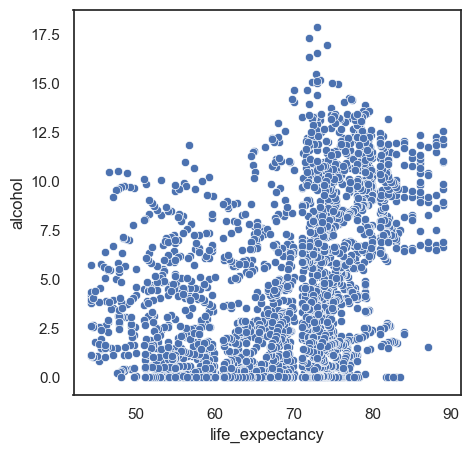

Correlation alcohol:0.4059181214769455


In [21]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=wins_df, x="life_expectancy", y="alcohol")
plt.show()
print("Correlation alcohol:" + str(pearson["life_expectancy"]["alcohol"]))

Кореляція з вживанням алкоголю позитивна: у країнах з більшим вживанням алкоголю очікувана тривалість життя зазвичай більша.

>Чи зазвичай у густонаселених країнах тривалість життя нижча?

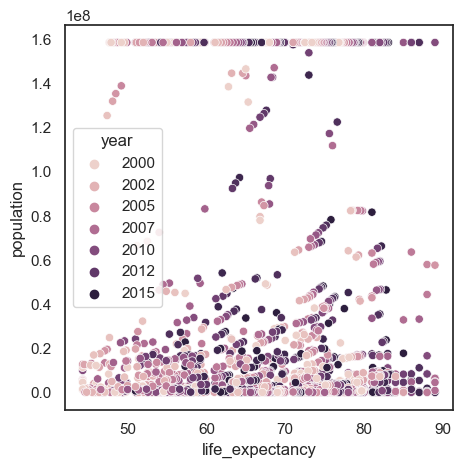

Correlation population:0.09339364469513377


In [22]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=wins_df, x="life_expectancy", y="population", hue="year")
plt.show()
print("Correlation population:" + str(pearson["life_expectancy"]["population"]))